# Harjoitustehtävä

## Datan tuominen ja yhdistäminen

Tuodaan ensin pandas-kirjasto.

In [2]:
import pandas as pd

Tuodaan sitten data.

In [87]:
ika = pd.read_excel(r"C:\Users\h02281\Desktop\liiketoiminnan analytiikan perusteet\2023\3002\python\keski-iat.xlsx")

In [46]:
ika.head()

,Alue,keski-ikä
0,Akaa,44.9
1,Alajärvi,46.6
2,Alavieska,44.1
3,Alavus,46.4
4,Asikkala,50.0


In [36]:
vakiluku = pd.read_excel(r"C:\Users\h02281\Desktop\liiketoiminnan analytiikan perusteet\2023\3002\python\keskivakiluku.xlsx")

In [37]:
vakiluku.head()

,Alue,Keskiväkiluku
0,Akaa,16429.0
1,Alajärvi,9365.0
2,Alavieska,2504.0
3,Alavus,11264.5
4,Asikkala,8046.0


Yhdistetään nämä yhdeksi taulukoksi.

In [39]:
taulukko = ika.merge(vakiluku,on='Alue',how='outer')

In [79]:
taulukko

,Alue,keski-ikä,Keskiväkiluku
0,Akaa,44.9,16429.0
1,Alajärvi,46.6,9365.0
2,Alavieska,44.1,2504.0
3,Alavus,46.4,11264.5
4,Asikkala,50.0,8046.0
...,...,...,...
304,Ylivieska,40.4,15330.5
305,Ylöjärvi,40.9,33442.5
306,Ypäjä,48.8,2298.0
307,Ähtäri,49.7,5503.0


## Tunnuslukuja

Lasketaan tunnuslukuja molemmille muuttujille.

In [55]:
taulukko['keski-ikä'].describe()

count    309.000000
mean      47.492557
std        4.591880
min       33.200000
25%       44.200000
50%       47.600000
75%       50.800000
max       56.900000
Name: keski-ikä, dtype: float64

In [56]:
taulukko['Keskiväkiluku'].describe()

count       309.000000
mean      17932.093851
std       49942.793711
min         103.000000
25%        2691.000000
50%        5991.500000
75%       14694.000000
max      657688.500000
Name: Keskiväkiluku, dtype: float64

## Tarkastellaan muuttujien yhteyttä

Lasketaan muuttujien välinen korrelaatiokerroin.

In [72]:
taulukko['Keskiväkiluku'].corr(taulukko['keski-ikä'])

-0.3063180422850269

Tuodaan grafiikkaan liittyvät kirjastot.

In [48]:
import matplotlib

In [57]:
from matplotlib import pyplot as plt

Muodostetaan hajontakuvio.

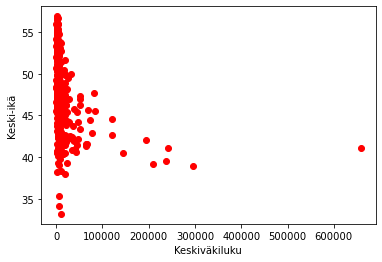

In [63]:
plt.plot(taulukko['Keskiväkiluku'],taulukko['keski-ikä'],'ro')
plt.xlabel('Keskiväkiluku')
plt.ylabel('Keski-ikä')
plt.show()

Tästä ei oikein saa selvää pienempien kuntien osalta selvää.
Mitä voit päätellä keski-iästä isompien kuntien osalta (väkiluku vähintään 100000)?

Tarkastellaan seuraavaksi pienempiä kuntia. Muodostetaan taulukko, johon suodatetaan vain alle sadantuhannen asukkaan kunnat.

In [73]:
taulukkoPienet = taulukko[taulukko['Keskiväkiluku']<100000]

In [74]:
taulukkoPienet['Keskiväkiluku'].corr(taulukkoPienet['keski-ikä'])

-0.3741997599376675

In [90]:
taulukkoPienet['keski-ikä'].describe()

count    300.000000
mean      47.684333
std        4.512723
min       33.200000
25%       44.600000
50%       47.650000
75%       50.900000
max       56.900000
Name: keski-ikä, dtype: float64

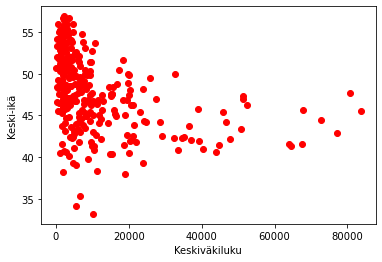

In [91]:
plt.plot(taulukkoPienet['Keskiväkiluku'],taulukkoPienet['keski-ikä'],'ro')
plt.xlabel('Keskiväkiluku')
plt.ylabel('Keski-ikä')
plt.show()

Tarkastellaan lopuksi vielä suurempia kuntia.

In [76]:
taulukkoSuuret = taulukko[taulukko['Keskiväkiluku']>=100000]

In [92]:
taulukkoSuuret['keski-ikä'].describe()

count     9.000000
mean     41.100000
std       1.817966
min      39.000000
25%      39.600000
50%      41.100000
75%      42.100000
max      44.600000
Name: keski-ikä, dtype: float64

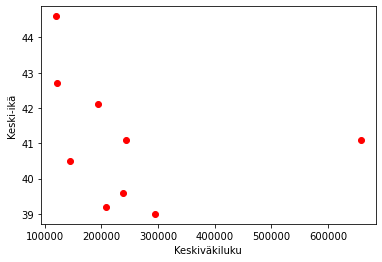

In [93]:
plt.plot(taulukkoSuuret['Keskiväkiluku'],taulukkoSuuret['keski-ikä'],'ro')
plt.xlabel('Keskiväkiluku')
plt.ylabel('Keski-ikä')
plt.show()

Vaikuttaa siltä, että isommissa kunnissa asuu nuorempia ihmisiä.